# 0. EDA och filhantering
- a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder, glöm inte att lägga till den till .gitignore.

In [35]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from random import sample
from random import shuffle
import os
import numpy as np
import shutil
from PIL import Image

# Paths

In [36]:
original_data = 'original_data/train'
experiment_small_data = 'experiment_small_data'

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

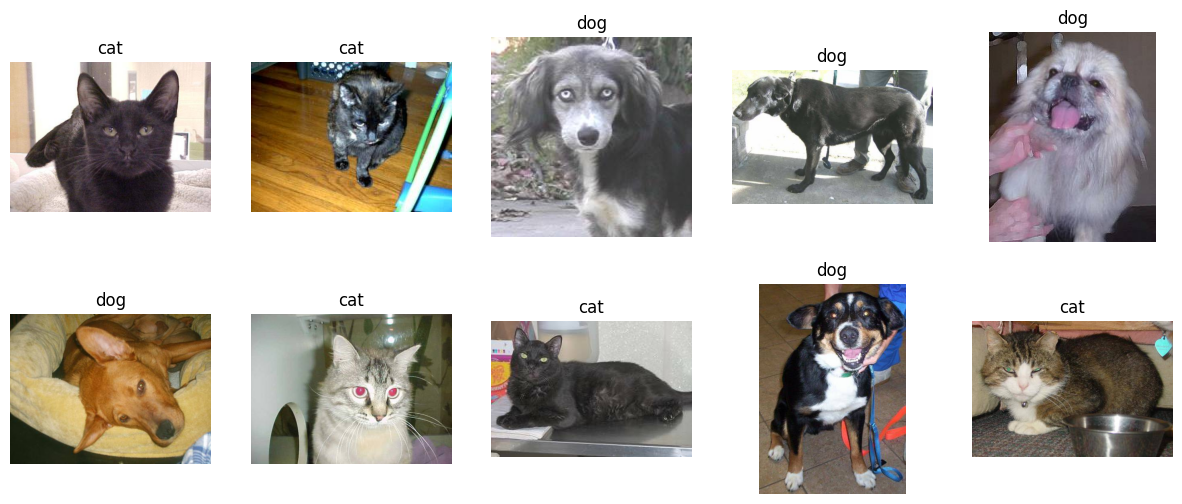

In [22]:
# Create list with all images
all_images = [os.path.join(original_data, f) for f in os.listdir(original_data) if os.path.isfile(os.path.join(original_data, f))]

# Pick 10 random pictures from the list
random_images = sample(all_images, 10)

def load_image(image_path):
    img = cv2.imread(image_path)
    # Makes images less blue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Load images
images = [load_image(image_path) for image_path in random_images]
labels = [os.path.basename(image_path).split('.')[0] for image_path in random_images]

plot_images(images, labels)

c) Skapa folderstrukturen nedan med Python:

├── experiment_small_data<br>
│   ├── test<br>
│   ├── train<br>
│   └── val<br>
├── experiment_tiny_data<br>
│   ├── test<br>
│   ├── train<br>
│   └── val<br>
├── lab.ipynb<br>
└── original_data<br>
    ├── test<br>
    └── train<br>

In [23]:
folders = [
    ('experiment_small_data', ['test', 'train', 'val']),
    ('experiment_tiny_data', ['test', 'train', 'val']),
    ('original_data', [])
]

for folder, subfolders in folders:
    for subfolder in subfolders:
        Path(folder, subfolder).mkdir(parents=True, exist_ok=True)

d) Nu ska du göra train|val|test split med följande splits:

- train - 1600 (800 dogs, 800 cats)
- val - 400 (200 dogs, 200 cats)
- test - 500 (250 dogs, 250 cats)

# Hur blir det om man kör cellen 2 gånger?

In [24]:
def copy_files(files, subdir):
    for file in files:
        # Copy files from 'original_folder' to 'target_dir'
        shutil.copy(file, os.path.join(experiment_small_data, subdir, os.path.basename(file)))

# Read files and shuffle
dog_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('dog')]
cat_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('cat')]
np.random.shuffle(dog_files)
np.random.shuffle(cat_files)

train_dogs, val_dogs, test_dogs = 800, 200, 250
train_cats, val_cats, test_cats = 800, 200, 250

# Sampling without replacement for dogs 
dogs_train = dog_files[:train_dogs]
dogs_val = dog_files[train_dogs:train_dogs+val_dogs]
dogs_test = dog_files[train_dogs+val_dogs:train_dogs+val_dogs+test_dogs]

copy_files(dogs_train, 'train')
copy_files(dogs_val, 'val')
copy_files(dogs_test, 'test')

# Sampling without replacement for cats
cats_train = cat_files[:train_cats]
cats_val = cat_files[train_cats:train_cats+val_cats]
cats_test = cat_files[train_cats+val_cats:train_cats+val_cats+test_cats]

copy_files(cats_train, 'train')
copy_files(cats_val, 'val')
copy_files(cats_test, 'test')

e) Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1.

In [44]:
import random

def get_image_filenames(directory):
    # Returns list with filenames that ends with '.jpg'  
    filenames = [file for file in os.listdir(directory) if file.endswith('.jpg')]
    random.shuffle(filenames)  # Shuffle the list
    return filenames

# Create lists with filenames
train_list = get_image_filenames(os.path.join(experiment_small_data, 'train'))
test_list = get_image_filenames(os.path.join(experiment_small_data, 'test'))
val_list = get_image_filenames(os.path.join(experiment_small_data, 'val'))

# Print number of files in each dataset 
print(f"Train files: {len(train_list)}")
print(f"Test files: {len(test_list)}")
print(f"Val files: {len(val_list)}")

Train files: 1600
Test files: 500
Val files: 400


In [45]:
def load_images(directory, filenames):
    # Load images and return list with numpy arrays 
    images = [np.array(Image.open(os.path.join(directory, filename))) for filename in filenames]
    return images

X_train = load_images(os.path.join(experiment_small_data, 'train'), train_list)
X_test = load_images(os.path.join(experiment_small_data, 'test'), test_list)
X_val = load_images(os.path.join(experiment_small_data, 'val'), val_list)

print(f"Train images: {len(X_train)}")
print(f"Test images: {len(X_test)}")
print(f"Val images: {len(X_val)}")

Train images: 1600
Test images: 500
Val images: 400


In [46]:
X_train

[array([[[171, 166, 126],
         [171, 166, 126],
         [172, 167, 127],
         ...,
         [157, 163, 127],
         [157, 163, 127],
         [157, 163, 127]],
 
        [[173, 168, 128],
         [173, 168, 128],
         [173, 168, 128],
         ...,
         [157, 163, 127],
         [157, 163, 127],
         [157, 163, 127]],
 
        [[174, 169, 129],
         [174, 169, 129],
         [174, 169, 129],
         ...,
         [157, 163, 127],
         [157, 163, 127],
         [157, 163, 127]],
 
        ...,
 
        [[136, 143, 102],
         [137, 144, 103],
         [138, 145, 104],
         ...,
         [ 93, 102,  49],
         [ 92, 102,  49],
         [ 92, 101,  48]],
 
        [[138, 145, 104],
         [139, 146, 105],
         [141, 148, 107],
         ...,
         [ 83,  93,  41],
         [ 81,  94,  41],
         [ 82,  92,  40]],
 
        [[139, 146, 105],
         [140, 147, 106],
         [141, 148, 107],
         ...,
         [ 88, 100,  50],
  

In [47]:
X_train[2].shape

(500, 403, 3)

In [50]:
# Extract labels from filenames
def extract_labels(filename):
    if 'cat' in filename:
        return 0
    else:
        return 1

y_train = [extract_labels(filename) for filename in train_list]
y_val = [extract_labels(filename) for filename in val_list]
y_test = [extract_labels(filename) for filename in test_list]

In [49]:
y_train

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,


# Plot
Plotta några bilder med deras respektive labels och kontrollera att det är korrekt.

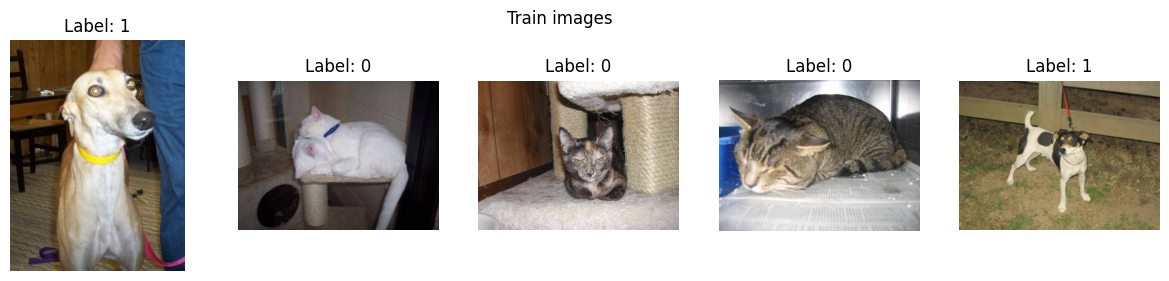

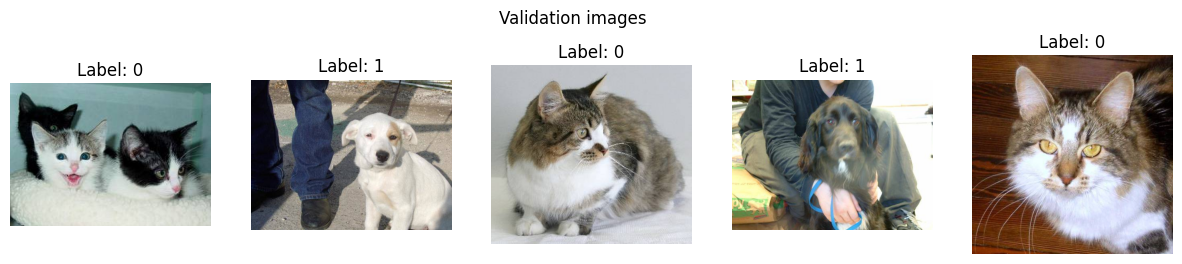

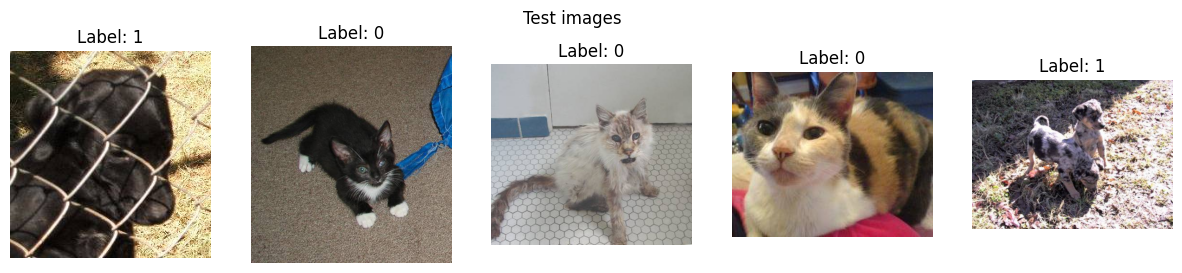

In [52]:
def plot_images_labels(images, labels, title, num_images=5):
    # Choose 6 random images and labels   
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))
    for ax, index in zip(axes, indices):
        ax.imshow(images[index])
        ax.set_title(f'Label: {labels[index]}')
        ax.axis('off')  
    plt.suptitle(title)
    plt.show()

plot_images_labels(X_train, y_train, 'Train images')
plot_images_labels(X_val, y_val, 'Validation images')
plot_images_labels(X_test, y_test, 'Test images')

Skapa lämplig plot för att kontrollera att dataseten är balanserade

Skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex:
[0, 0, ... 0, 1, 1, ..., 1]